# Training

## Import librerie necessarie

In [274]:
!pip install -r requirements.txt

You should consider upgrading via the 'c:\users\susan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

## Import del training set e test set

In [276]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
pokemon = pd.read_csv("./pokemon.csv")

## Data analysis

In [277]:
# stampo la lista delle feature
train.columns

Index(['Winner', 'First_pokemon', 'Second_pokemon'], dtype='object')

In [278]:
train.head(5)

,Winner,First_pokemon,Second_pokemon
0,124,124,221
1,1,323,1
2,58,58,459
3,491,180,491
4,799,799,559


In [279]:
train.sample(5)

,Winner,First_pokemon,Second_pokemon
8435,28,28,501
27029,518,89,518
31065,309,11,309
24979,477,444,477
19255,532,740,532


In [280]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,408.302250,400.581500,402.452063
std,231.131808,229.831285,230.277071
min,1.000000,1.000000,1.000000
25%,205.000000,202.000000,206.000000
50%,421.000000,400.000000,401.000000
75%,606.000000,599.000000,602.000000
max,800.000000,800.000000,800.000000


In [281]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [282]:
# controllo se ci sono valori nulli
pd.isnull(train).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [283]:
# stampo la lista delle feature
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [284]:
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [285]:
pokemon.sample(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
198,199,Marill,Water,Fairy,70,20,50,20,50,40,2,False
319,320,Exploud,Normal,NaN,104,91,63,91,73,68,3,False
305,306,Gardevoir,Psychic,Fairy,68,65,65,125,115,80,3,False
276,277,Torchic,Fire,NaN,45,60,40,70,50,45,3,False
49,50,Gloom,Grass,Poison,60,65,70,85,75,40,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,Phantump,Ghost,Grass,43,70,48,50,60,38,6,False
225,226,Snubbull,Fairy,NaN,60,80,50,40,40,30,2,False
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False
237,238,Magcargo,Fire,Rock,50,50,120,80,80,30,2,False


In [286]:
pokemon.describe(include='all')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Chatot,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [287]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [288]:
# controllo se ci sono valori nulli
pd.isnull(pokemon).sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [289]:
# In pokemon rinomino la colonna # in ID, Type 1 in Type1 e Type 2 in Type2
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

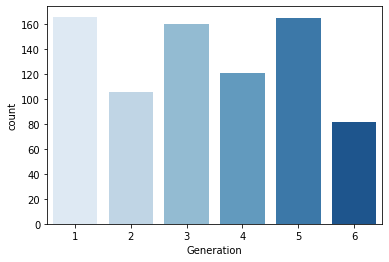

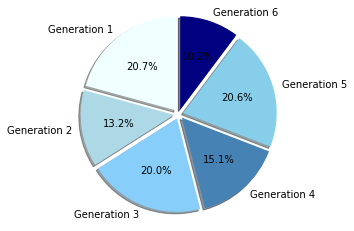

In [290]:
# Quanti pokemon di ogni generazione
sns.countplot(x=pokemon["Generation"], palette='Blues') 

# Quanti pokemon di ogni generazione, in percentuale sul totale dei pokemon
fig1, ax1 = plt.subplots()
g = pokemon.groupby('Generation').count()['ID']
sizes = [g[1],g[2],g[3],g[4],g[5],g[6]]
lab = ['Generation 1','Generation 2','Generation 3','Generation 4','Generation 5','Generation 6']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
colors = ['azure','lightblue','lightskyblue','steelblue','skyblue','navy']
ax1.pie(sizes, autopct='%1.1f%%', explode = explode, labels = lab, colors = colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

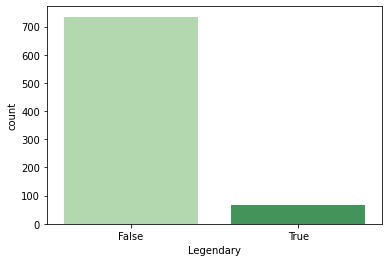

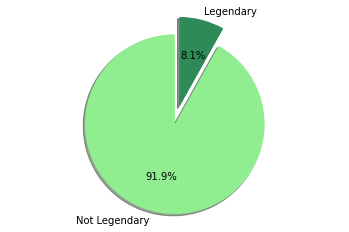

In [291]:
# Quanti pokemon leggendari
sns.countplot(x=pokemon["Legendary"], palette = 'Greens')

# Quanti pokemon leggendari, in percentuale sul totale dei pokemon
fig1, ax1 = plt.subplots()
g = pokemon.groupby('Legendary').count()['ID']
sizes = [g[False],g[True]]
explode = (0, 0.2)
lab = ['Not Legendary','Legendary']
colors= ['lightgreen','seagreen']
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels = lab,
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

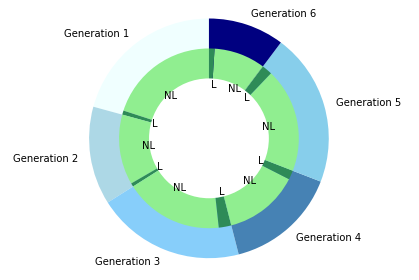

In [318]:
# Quanti pokemon leggendari per ogni generazione
labels = ['Generation 1', 'Generation 2', 'Generation 3', 'Generation 4','Generation 5','Generation 6']
g = pokemon.groupby('Generation').count()['ID']
sizes = [g[1],g[2],g[3],g[4],g[5],g[6]]

labels_legendary = ['NL','L','NL','L','NL','L','NL','L','NL','L','NL','L']
g1 = pokemon.loc[pokemon['Generation'] == 1].groupby('Legendary').count()['ID']
g2 = pokemon.loc[pokemon['Generation'] == 2].groupby('Legendary').count()['ID']
g3 = pokemon.loc[pokemon['Generation'] == 3].groupby('Legendary').count()['ID']
g4 = pokemon.loc[pokemon['Generation'] == 4].groupby('Legendary').count()['ID']
g5 = pokemon.loc[pokemon['Generation'] == 5].groupby('Legendary').count()['ID']
g6 = pokemon.loc[pokemon['Generation'] == 6].groupby('Legendary').count()['ID']
sizesLegendary = [g1[False],g1[True],g2[False],g2[True],g3[False],g3[True],g4[False],g4[True],g5[False],g5[True],g6[False],g6[True]]
colors = ['azure','lightblue','lightskyblue','steelblue','skyblue','navy']
colors_legendary = ['lightgreen','seagreen','lightgreen','seagreen','lightgreen','seagreen','lightgreen','seagreen','lightgreen','seagreen','lightgreen','seagreen']

# Plot
plt.pie(sizes, labels=labels, startangle=90,frame=True, colors = colors)
plt.pie(sizesLegendary, labels=labels_legendary, colors=colors_legendary, radius=0.75,startangle=90,labeldistance=0.6)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

### Le percentuali di Legendary e non sono equamente distribuite

<AxesSubplot:xlabel='Legendary', ylabel='Attack'>

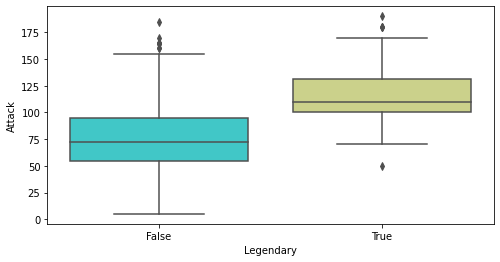

In [294]:
# boxplot of Attack vs. Legendary
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Attack',data=pokemon, palette='rainbow')

<AxesSubplot:xlabel='Legendary', ylabel='HP'>

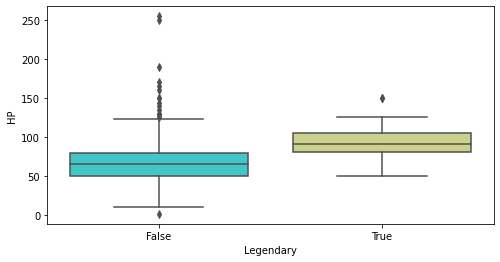

In [295]:
# boxplot of HP vs. Legendary
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='HP',data=pokemon, palette='rainbow')

In [296]:
# Valori nulli di Type2
type2null = pokemon.loc[pokemon['Type2'].isnull()]

In [297]:
type2null

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


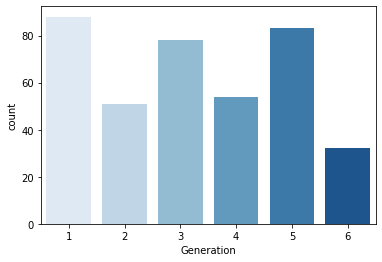

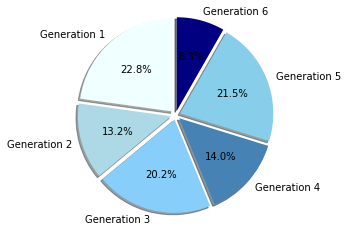

In [298]:
# Quanti pokemon ci sono per ogni generazione con type2 null
sns.countplot(x=type2null["Generation"], palette = 'Blues') 

# Quanti pokemon ci sono per ogni generazione con type2 null, in percentuale sul totale dei pokemon con type2 null
fig1, ax1 = plt.subplots()
g = type2null.groupby('Generation').count()['ID']
sizes = [g[1],g[2],g[3],g[4],g[5],g[6]]
lab = ['Generation 1','Generation 2','Generation 3','Generation 4','Generation 5','Generation 6']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
colors = ['azure','lightblue','lightskyblue','steelblue','skyblue','navy']
ax1.pie(sizes, autopct='%1.1f%%', explode = explode, labels = lab,
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Le percentuali sono simili a quelle sul totale dei pokemon

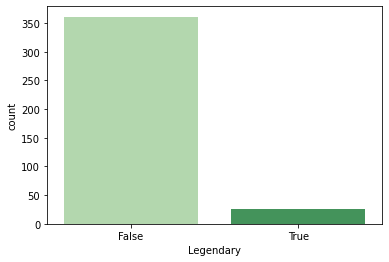

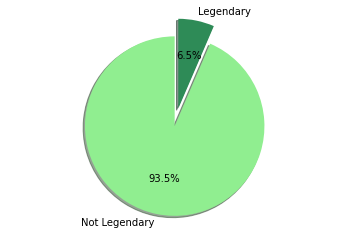

In [299]:
# Quanti pokemon leggendari con type2 null
sns.countplot(x=type2null["Legendary"], palette = 'Greens')

# Quanti pokemon leggendari con type2 null, in percentuale sul totale dei pokemon con type2 null
fig1, ax1 = plt.subplots()
g = type2null.groupby('Legendary').count()['ID']
sizes = [g[False],g[True]]
explode = (0, 0.2)
lab = ['Not Legendary','Legendary']
colors = ['lightgreen','seagreen',]
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels = lab,
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Anche qui le percentuali sono simili a quelle sul totale dei pokemon

## Preparazione dei dati

In [300]:
# Per la colonna 'Winner': se il vincitore è First_pokemon modifico il valore di 'Winner' in 1, altrimenti in 0
train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 1
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 0

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 1
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 0

### Unione dei due csv (train che contiene i combattimenti e pokemon che contiene le statistiche)

In [301]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [302]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [303]:
fights.head(10)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,1,124,221,124,Kangaskhan,Normal,NaN,105,95,80,40,80,90,1,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
1,1,61,221,61,Golduck,Water,NaN,80,82,78,95,80,85,1,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
2,1,515,221,515,Lickilicky,Normal,NaN,110,85,95,80,95,50,4,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
3,0,332,221,332,Lairon,Steel,Rock,60,90,140,50,50,40,3,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
4,0,210,221,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
5,1,269,221,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
6,1,119,221,119,Weezing,Poison,NaN,65,90,120,85,70,60,1,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
7,1,388,221,388,Mega Banette,Ghost,NaN,64,165,75,93,83,75,3,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
8,1,631,221,631,Garbodor,Poison,NaN,80,95,82,60,82,75,5,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False
9,1,167,221,167,Chikorita,Grass,NaN,45,49,65,49,65,45,2,False,221,Forretress,Bug,Steel,75,90,140,60,60,40,2,False


## Studio della correlazione fra le features

In [304]:
# Inserisco una colonna con la feature Legenday del vincitore
conditions = [
    (fights['Winner'] == 1),
    (fights['Winner'] == 0)]
choices = [fights['Legendary_x'], fights['Legendary_y']]
fights['LegendaryWinner'] = np.select(conditions, choices)
fights.sample(20)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,LegendaryWinner
21578,0,573,284,573,Pansear,Fire,NaN,50,53,48,53,48,64,5,False,284,Mega Swampert,Water,Ground,100,150,110,95,110,70,3,False,0
7124,0,304,795,304,Ralts,Psychic,Fairy,28,25,25,45,35,40,3,False,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,6,True,1
8813,1,525,175,525,Mamoswine,Ice,Ground,110,130,80,70,60,80,4,False,175,Feraligatr,Water,NaN,85,105,100,79,83,78,2,False,0
21914,0,13,729,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,729,Diggersby,Normal,Ground,85,56,77,50,77,78,6,False,0
992,0,346,154,346,Gulpin,Poison,NaN,70,43,53,43,53,40,3,False,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25418,1,613,121,613,Krokorok,Ground,Dark,60,82,45,45,45,74,5,False,121,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False,0
12813,1,575,676,575,Panpour,Water,NaN,50,53,48,53,48,64,5,False,676,Beartic,Ice,NaN,95,110,80,70,80,50,5,False,0
18911,0,89,163,89,Magnemite,Electric,Steel,25,35,70,95,55,45,1,False,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,1
18795,0,619,40,619,Dwebble,Bug,Rock,50,65,85,35,35,55,5,False,40,Nidoking,Poison,Ground,81,102,77,85,75,85,1,False,0


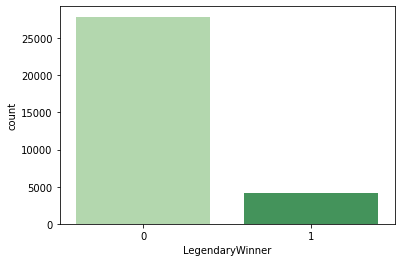

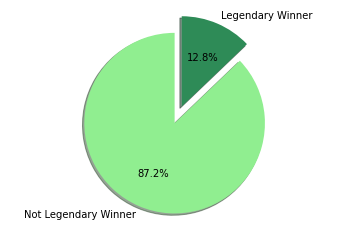

In [305]:
# Quanti scontri sono vinti da un pokemon leggendario
sns.countplot(x=fights["LegendaryWinner"], palette = 'Greens')

# Quanti scontri sono vinti da un pokemon leggendario, in percentuale sul totale degli scontri
fig1, ax1 = plt.subplots()
g = fights.groupby('LegendaryWinner').count()['ID_x']
sizes = [g[0],g[1]]
explode = (0, 0.2)
lab = ['Not Legendary Winner','Legendary Winner']
colors = ['lightgreen','seagreen']
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', labels = lab,
        shadow=True, startangle=90,colors= colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Anche qui non ci sono particolari differenze con le percentuali dei leggendari sul totale dei pokemon

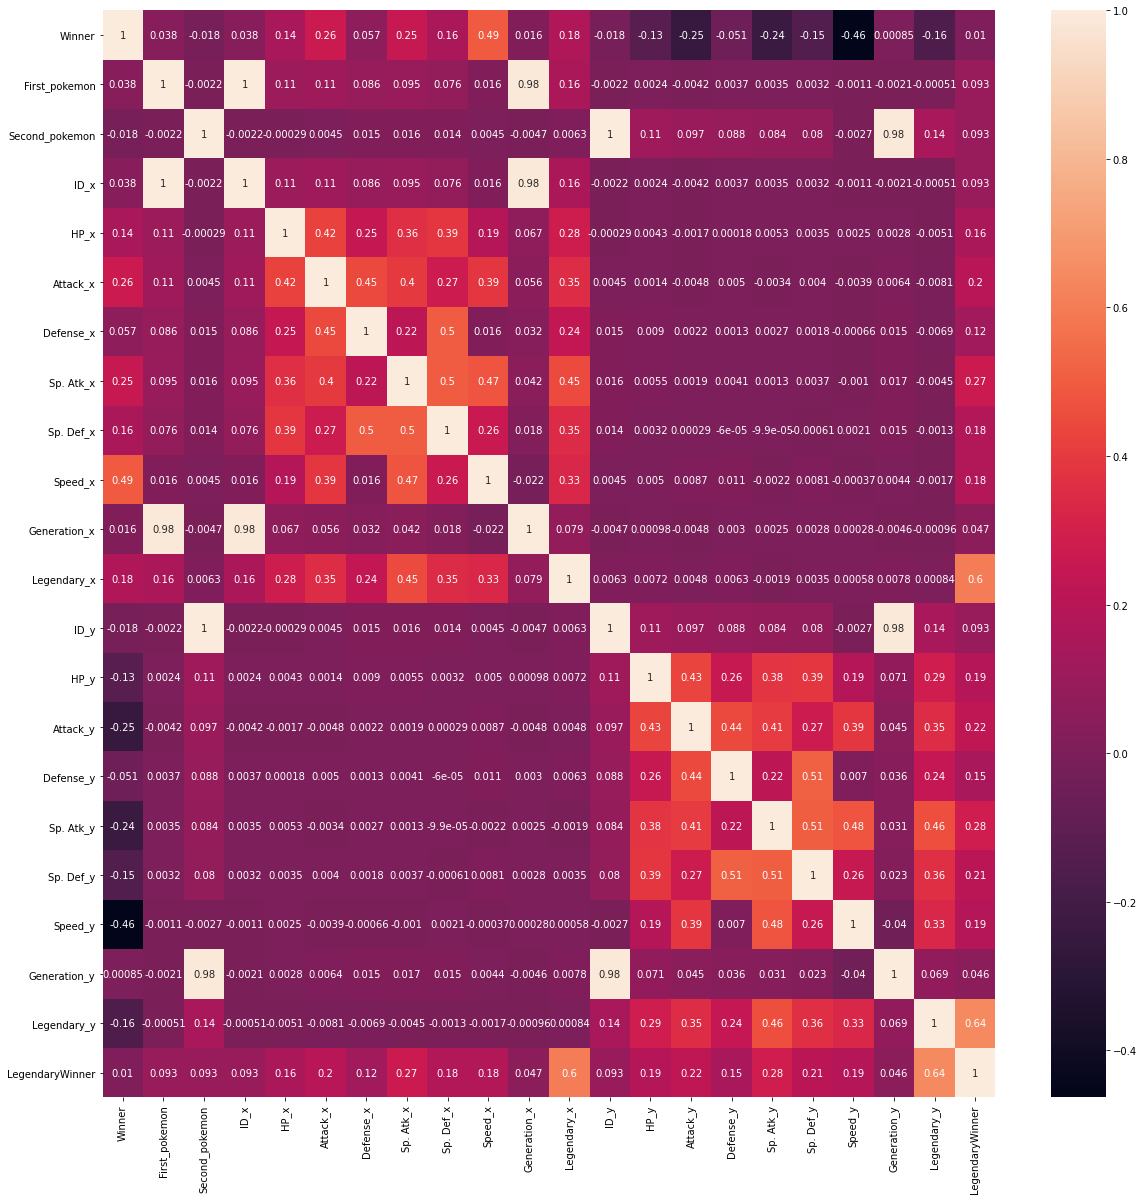

In [306]:
plt.subplots(figsize=(20,20))
sns.heatmap(fights.corr(), annot=True)
plt.show()

### La feature Generation, avendo una bassa correlazione con la feature Winner, può essere rimossa.

## Feature engineering

In [307]:
# Codifico i valori di Legendary_x e Legendary_y in interi, così da poterli confrontare e utilizzare
fights["Legendary_x"] = fights["Legendary_x"].astype(int)
fights["Legendary_y"] = fights["Legendary_y"].astype(int)
fights_test["Legendary_x"] = fights_test["Legendary_x"].astype(int)
fights_test["Legendary_y"] = fights_test["Legendary_y"].astype(int)

In [308]:
# Dalle analisi effettuate ho trovato le feature più utili ai nostri scopi
# Tra queste, confronto le statistiche dei due pokemon nel file di train
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]
fights["Legendary_diff"] = fights["Legendary_x"] - fights["Legendary_y"]

# Seleziono le colonne con le informazioni più utili
# Quindi qui ID, Name e Generation vengono (implicitamente) scartate.
# ID e Name le elimino perchè sono tutti valori univoci (quindi non utili)
# e Generation per la bassa correlazione con la vittoria 
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [309]:
# Dalle analisi effettuate ho trovato le feature più utili ai nostri scopi
# Tra queste, confronto le statistiche dei due pokemon nel file di test
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]
fights_test["Legendary_diff"] = fights_test["Legendary_x"] - fights_test["Legendary_y"]

# Seleziono le colonne con le informazioni più utili
# Quindi qui ID, Name e Generation vengono (implicitamente) scartate.
# ID e Name le elimino perchè sono tutti valori univoci (quindi non utili)
# e Generation per la bassa correlazione con la vittoria 
fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [310]:
# Valori nulli di Type2: inserisco "No" al posto di NaN
fights["Type2_x"].replace(np.nan, "No", inplace=True)
fights["Type2_y"].replace(np.nan, "No", inplace=True)

fights_test["Type2_x"].replace(np.nan, "No", inplace=True)
fights_test["Type2_y"].replace(np.nan, "No", inplace=True)

In [311]:
fights.sample(15)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
6005,18,39,20,67,25,45,Ghost,Fighting,Grass,Psychic,0,1
13975,36,-12,62,27,21,16,Rock,Bug,Grass,Poison,0,0
6687,-47,-6,-17,-18,-35,-62,Water,Electric,No,No,0,0
10380,-10,-24,-20,-5,-2,-45,Normal,Fighting,Flying,No,0,0
1281,23,10,-108,-133,-10,23,Grass,Rock,Poison,Steel,0,0
92,-20,10,40,-50,10,40,Normal,Fire,No,Rock,0,1
13029,56,50,66,15,55,5,Normal,Bug,Flying,No,0,1
1002,35,-45,-30,30,-25,-40,Water,Rock,No,Flying,0,0
22607,-4,-28,32,150,10,45,Steel,Water,Ground,No,0,0
8049,19,23,13,-15,15,30,Water,Ground,No,No,0,1


In [312]:
fights.corr(method = "spearman")

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Legendary_diff,Winner
Sp_Atk_diff,1.000000,0.463801,0.530921,0.263222,0.426216,0.369411,0.416465,0.348872
Speed_diff,0.463801,1.000000,0.285818,0.051054,0.233562,0.369695,0.323050,0.735443
Sp_Def_diff,0.530921,0.285818,1.000000,0.528902,0.442693,0.296223,0.337492,0.240954
Defense_diff,0.263222,0.051054,0.528902,1.000000,0.361091,0.475072,0.256349,0.103221
HP_diff,0.426216,0.233562,0.442693,0.361091,1.000000,0.511449,0.303306,0.232829
Attack_diff,0.369411,0.369695,0.296223,0.475072,0.511449,1.000000,0.332893,0.358636
Legendary_diff,0.416465,0.323050,0.337492,0.256349,0.303306,0.332893,1.000000,0.240189
Winner,0.348872,0.735443,0.240954,0.103221,0.232829,0.358636,0.240189,1.000000


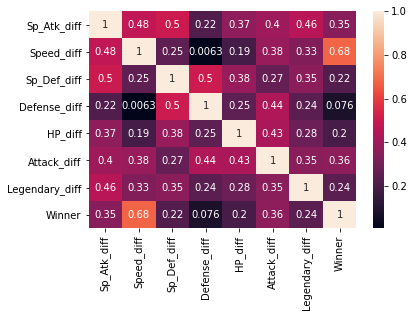

In [313]:
# Correlazione tra le feature finali
sns.heatmap(fights.corr(), annot=True)
plt.show()

### Da qui si nota che la feature 'Defense_diff' ha una correlazione molto bassa, quindi la posso rimuovere.

In [314]:
# Rimuovo direttamente 'Defense_diff' per bassa correlazione (dalla heatmap)
fights = fights.drop('Defense_diff', axis=1)
fights_test = fights_test.drop('Defense_diff', axis=1)

## Addestramento del modello

In [315]:
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

In [316]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [317]:
# fase di training
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Test Set predictions:', y_pred)
# verifo l'accuracy del modello
print("Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

Test Set predictions: [1 0 0 ... 0 0 0]
Accuracy: 93.38%
